In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import SimpSOM as sps
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [5]:
df = pd.read_csv('parameterWQI.csv')
df.head()

,ID STN BARU,DO\n% Sat,BOD\nmg/l,COD\nmg/l,SS\nmg/l,pH,NH3-N\nmg/l
0,4TSTU002,94.900,2.0,9.0,26.0,6.910,0.18
1,4TSTU002,97.800,4.0,10.0,20.0,7.520,0.21
2,4TSTU002,97.400,3.0,11.0,5.0,6.900,0.10
3,4TSTU002,100.100,3.0,10.0,11.0,7.000,0.40
4,4TSTU002,97.381,4.0,10.0,22.0,7.301,0.22


In [6]:
label_vectors = df['ID STN BARU'].values
feature_vectors = df.drop(['ID STN BARU'], axis=1).values

scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!                              


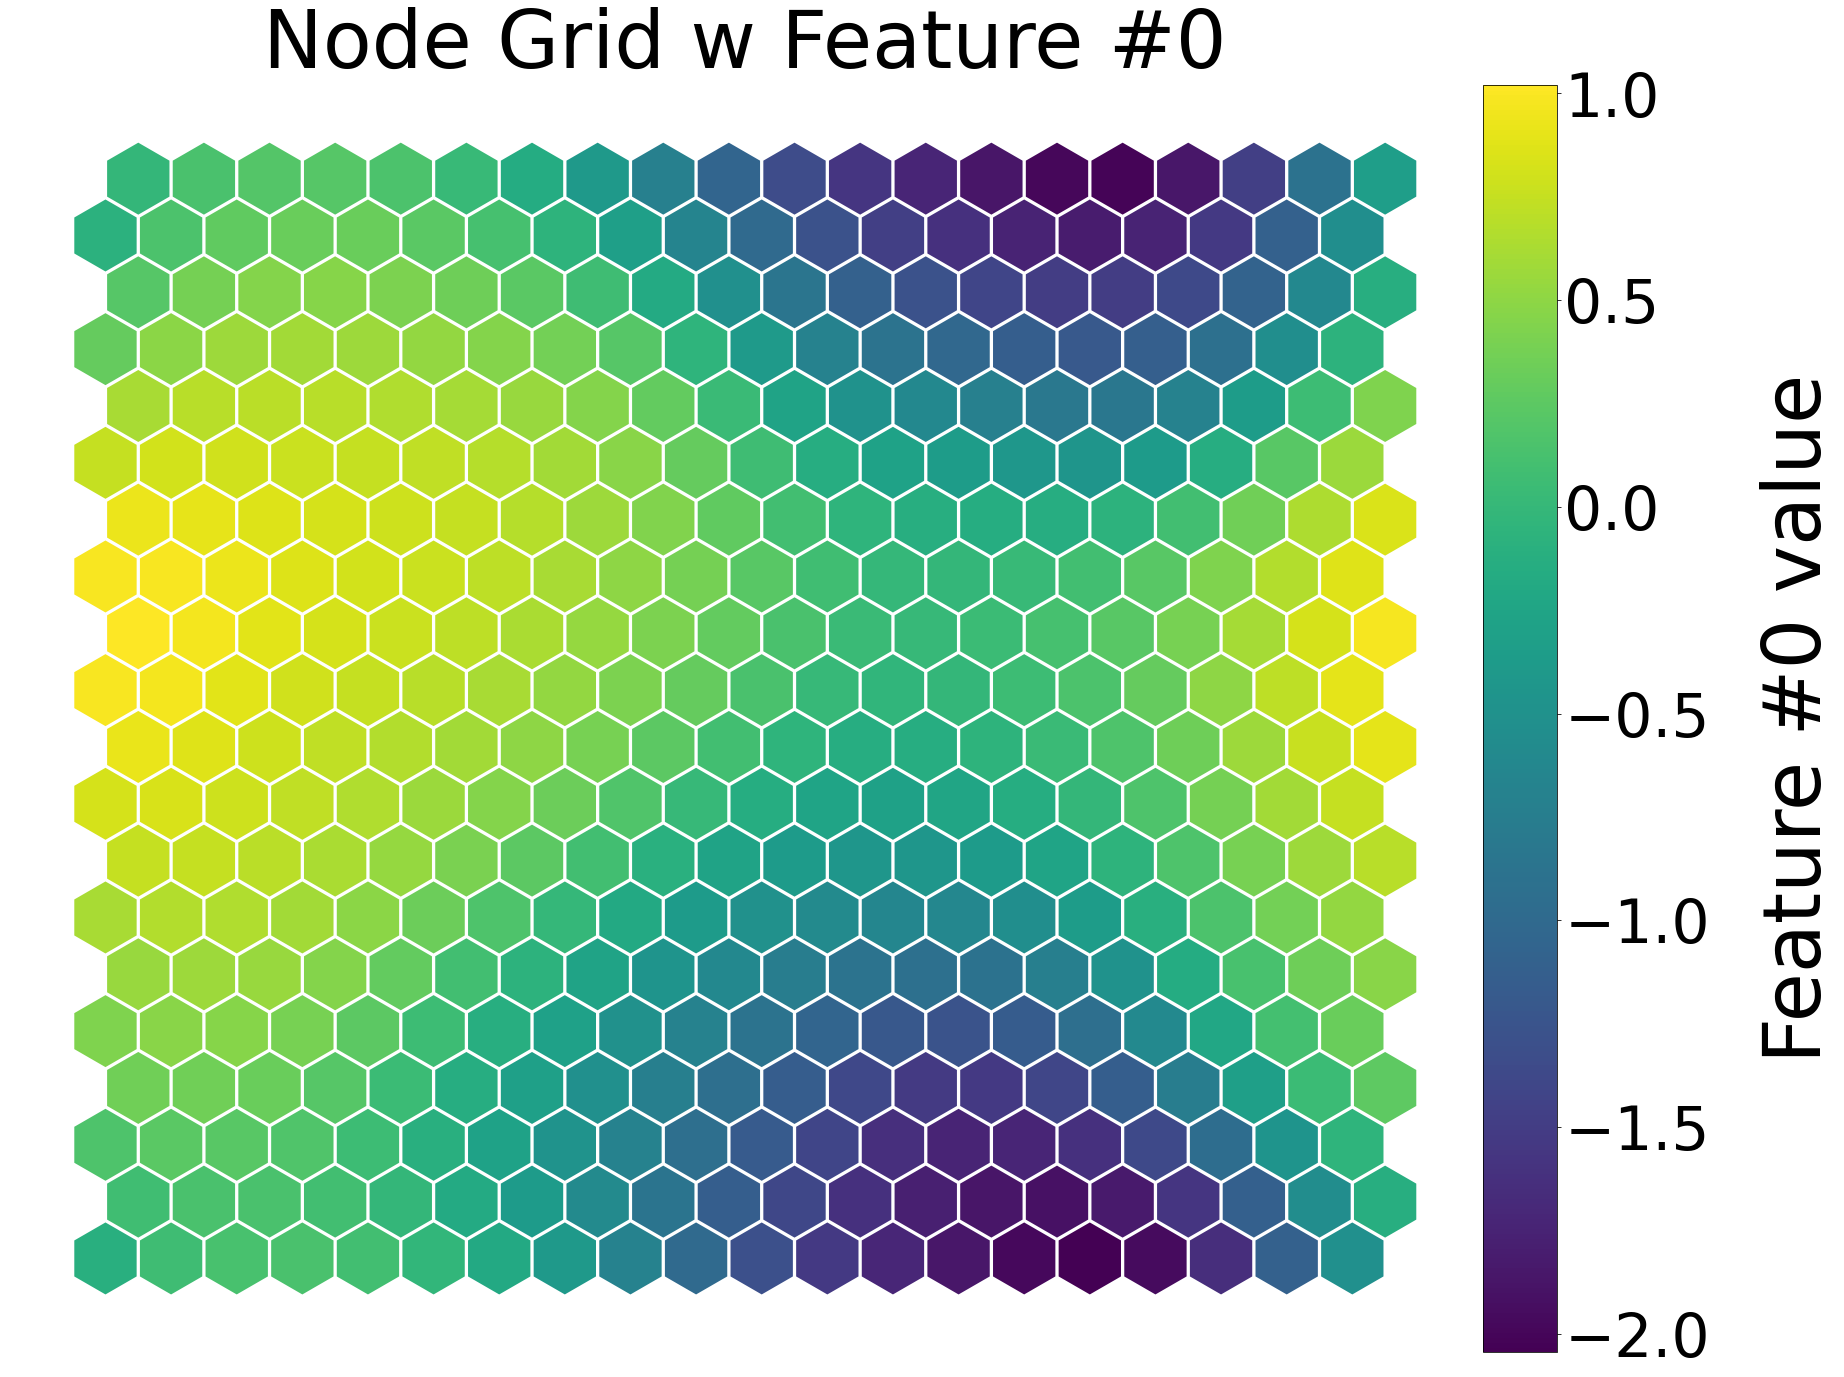

In [7]:
net = sps.somNet(20, 20, feature_vectors_scaler, PBC=True)
net.train(0.01, 20000)
net.save('filename_weights')
net.nodes_graph(colnum=0)

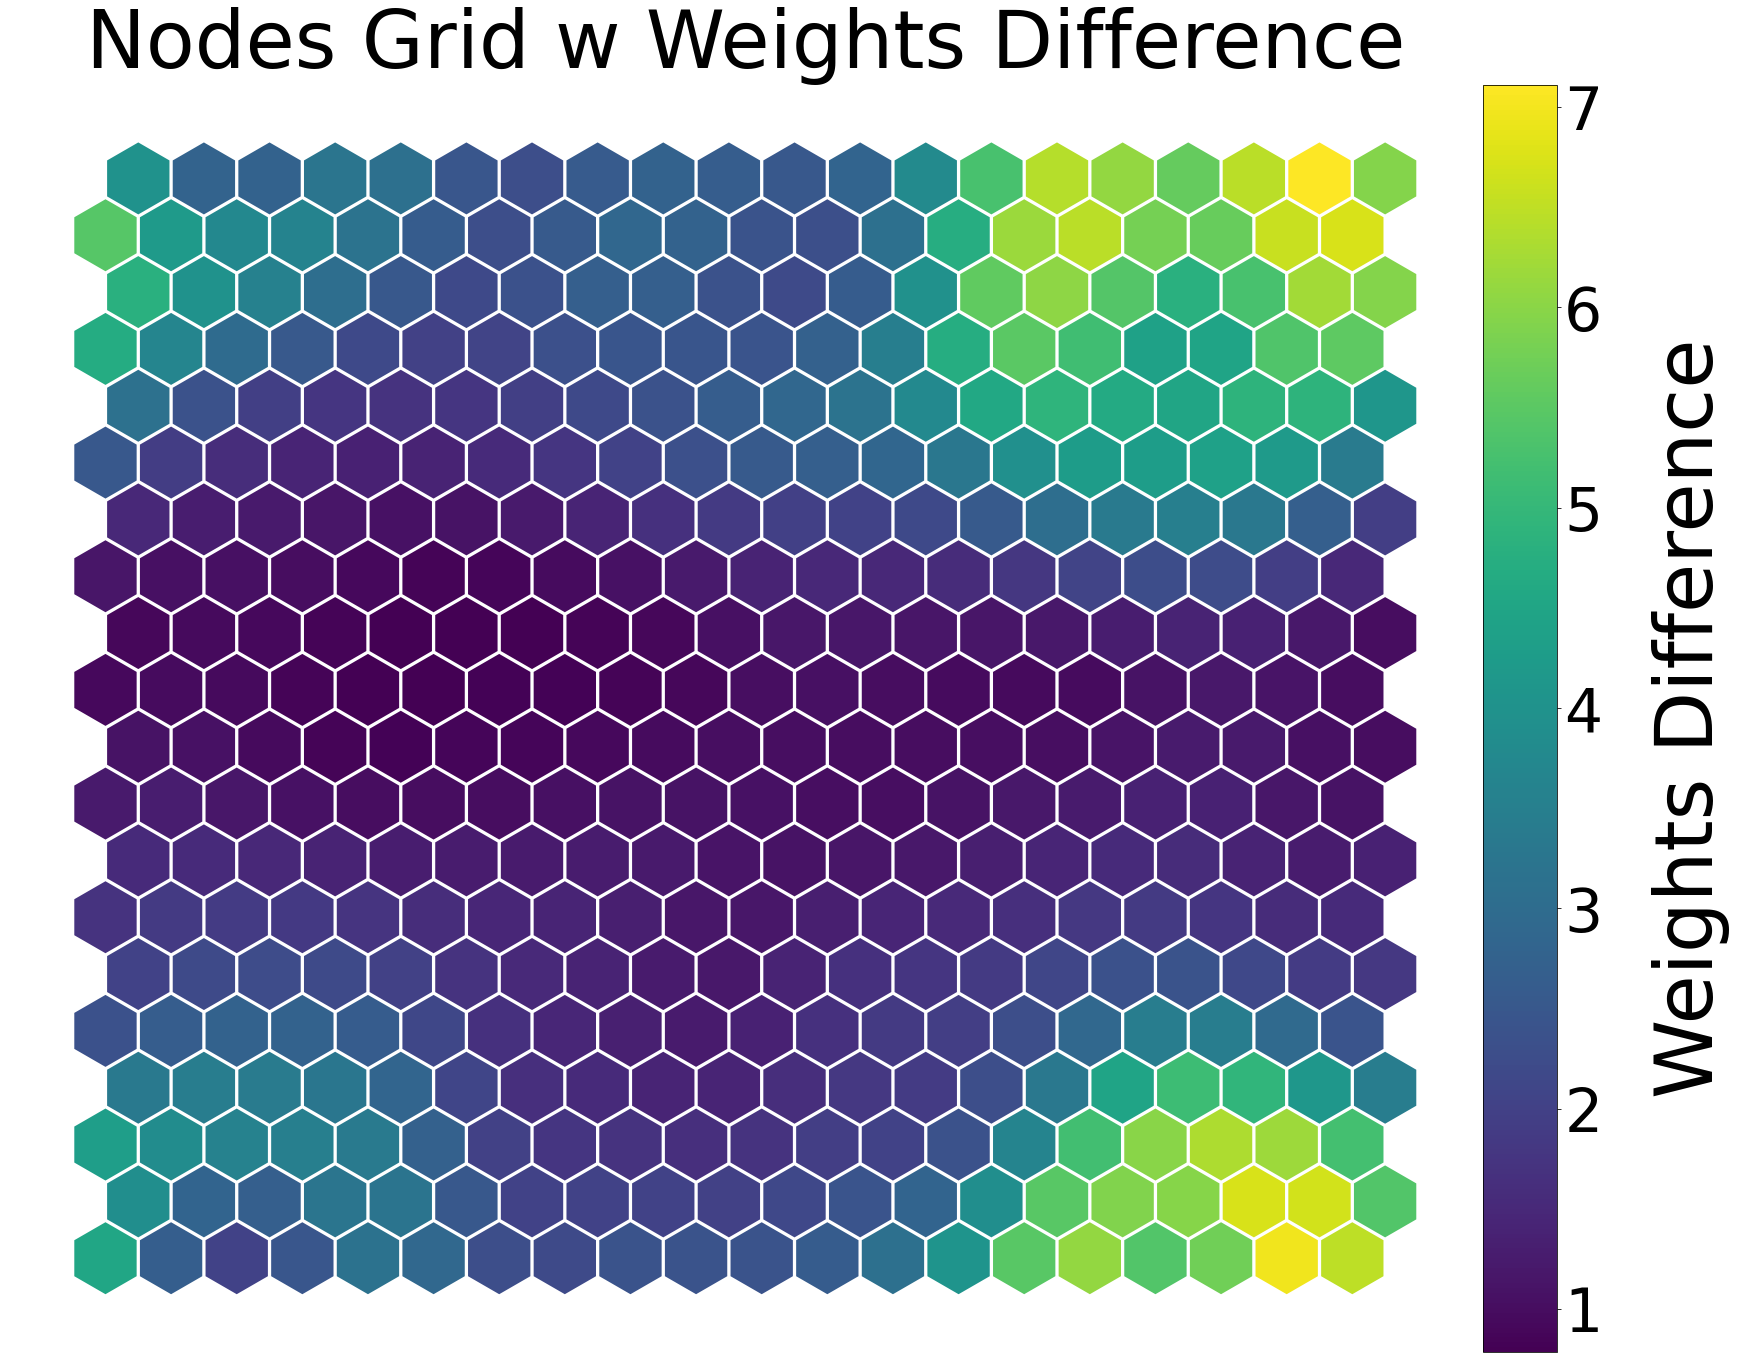

In [8]:
net.diff_graph()

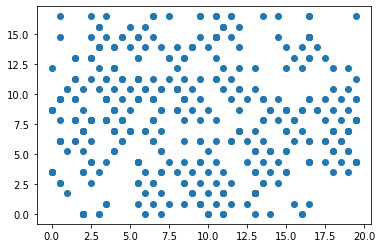

In [9]:
prj=np.array(net.project(feature_vectors_scaler))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)
df["clusters"]=kmeans.labels_

In [9]:
cluster1_Somstandardize=df[df["clusters"]==0]
cluster1_Somstandardize

,ID STN BARU,DO\n% Sat,BOD\nmg/l,COD\nmg/l,SS\nmg/l,pH,NH3-N\nmg/l,clusters
1,4TSTU002,97.800,4.0,10.0,20.0,7.520,0.21,0
2,4TSTU002,97.400,3.0,11.0,5.0,6.900,0.10,0
3,4TSTU002,100.100,3.0,10.0,11.0,7.000,0.40,0
4,4TSTU002,97.381,4.0,10.0,22.0,7.301,0.22,0
7,4TTGG011,103.000,4.0,12.0,2.0,7.590,0.04,0
...,...,...,...,...,...,...,...,...
402,4TTGG003,100.700,3.0,10.0,19.0,7.000,0.20,0
404,4TTGG013,81.900,3.0,10.0,1.0,7.400,0.20,0
405,4TTGG001,74.600,4.0,16.0,9.0,7.800,0.20,0
406,4TTGG001,72.785,5.0,17.0,14.0,7.431,0.24,0


In [10]:
#sherlock_cluster1_SomRANDOMFORESTstandardize.to_excel('linkpat_cluster1_SomRANDOMFORESTstandardize.xls', index=False)

In [11]:
cluster2_Somstandardize=df[df["clusters"]==1]
cluster2_Somstandardize

,ID STN BARU,DO\n% Sat,BOD\nmg/l,COD\nmg/l,SS\nmg/l,pH,NH3-N\nmg/l,clusters
0,4TSTU002,94.900,2.0,9.0,26.0,6.910,0.18,1
5,4TSTU002,99.634,3.0,11.0,13.0,6.767,0.01,1
6,4TTGG002,93.200,4.0,11.0,20.0,6.970,0.05,1
17,4TTGG002,90.255,3.0,12.0,102.0,6.903,0.01,1
18,4TPKA001,84.400,6.0,15.0,111.0,6.290,0.28,1
...,...,...,...,...,...,...,...,...
408,4TTGG009,93.684,6.0,18.0,26.0,7.118,0.12,1
409,4TTGG013,76.966,5.0,14.0,18.0,7.225,0.14,1
410,4TTGG001,85.873,5.0,15.0,30.0,7.159,0.21,1
412,4TTGG009,74.660,4.0,16.0,30.0,6.778,0.01,1


In [12]:
#sherlock_cluster2_SomRANDOMFORESTstandardize.to_excel('linkpat_cluster2_SomRANDOMFORESTstandardize.xls', index=False)

In [13]:
print(df["clusters"])
a = linear_order_clustering(df["clusters"])

0      1
1      0
2      0
3      0
4      0
      ..
409    1
410    1
411    0
412    1
413    1
Name: clusters, Length: 414, dtype: int32


NameError: name 'linear_order_clustering' is not defined

In [14]:
print(*df["clusters"], sep='\n')

1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
0
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
1
1
1
0
0
1
1
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
0
0
1
1
1
1
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
0
0
1
1
1
0
1
1
0
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
0
0
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
0
1
1


In [15]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

For n_clusters = 2 The average silhouette_score is : 0.3682560096045417
For n_clusters = 3 The average silhouette_score is : 0.38601572786820654
For n_clusters = 4 The average silhouette_score is : 0.3970674902617579
For n_clusters = 5 The average silhouette_score is : 0.3907254696787543
For n_clusters = 6 The average silhouette_score is : 0.39562308215581
For n_clusters = 7 The average silhouette_score is : 0.39189067691771934
For n_clusters = 8 The average silhouette_score is : 0.38263217006427636
For n_clusters = 9 The average silhouette_score is : 0.3833764221171191
For n_clusters = 10 The average silhouette_score is : 0.373863190580299


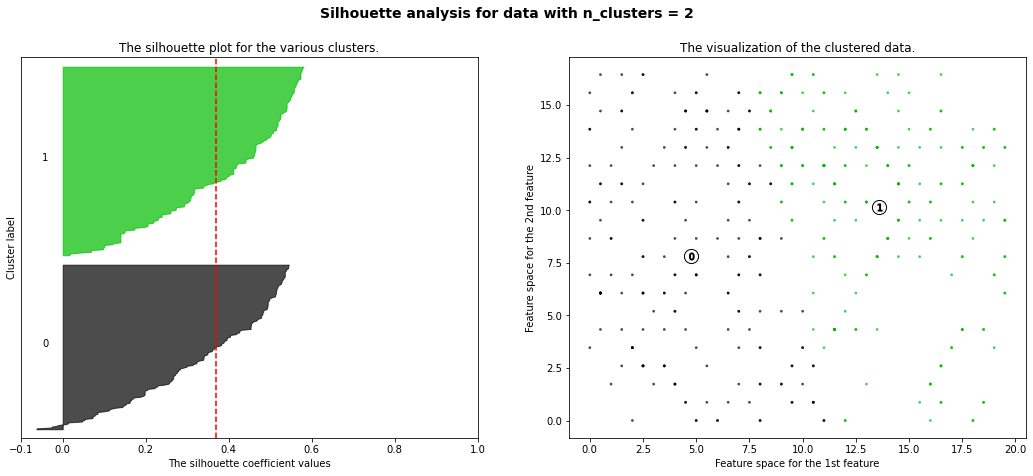

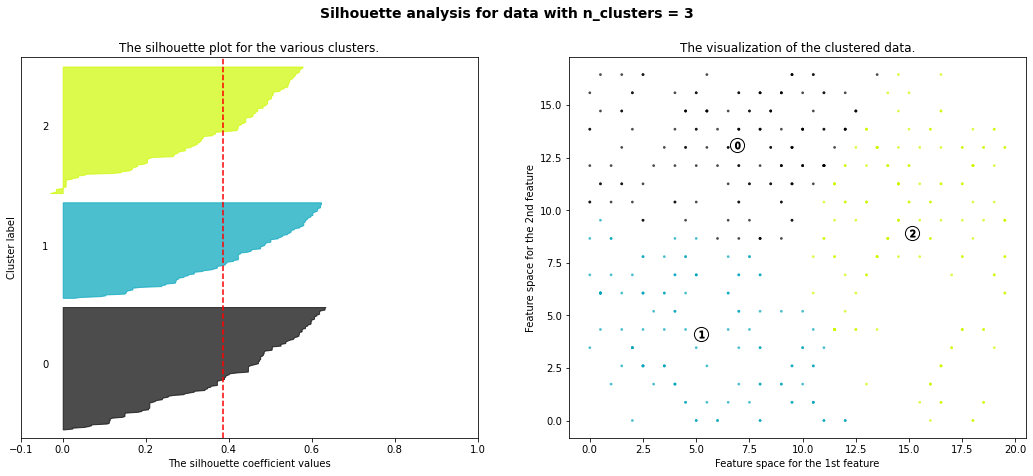

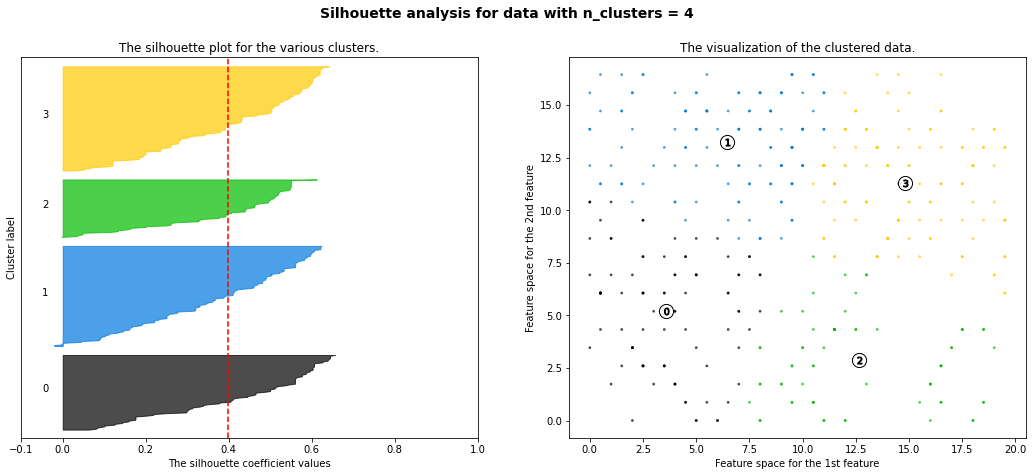

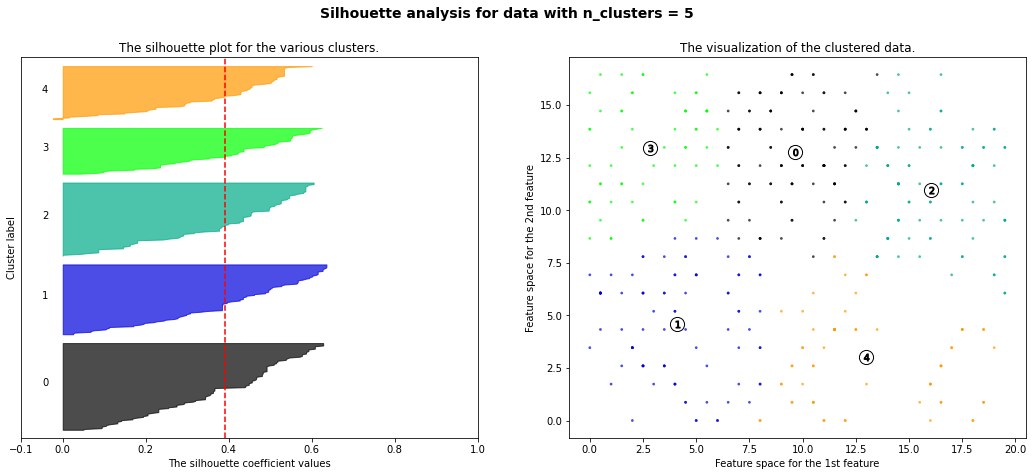

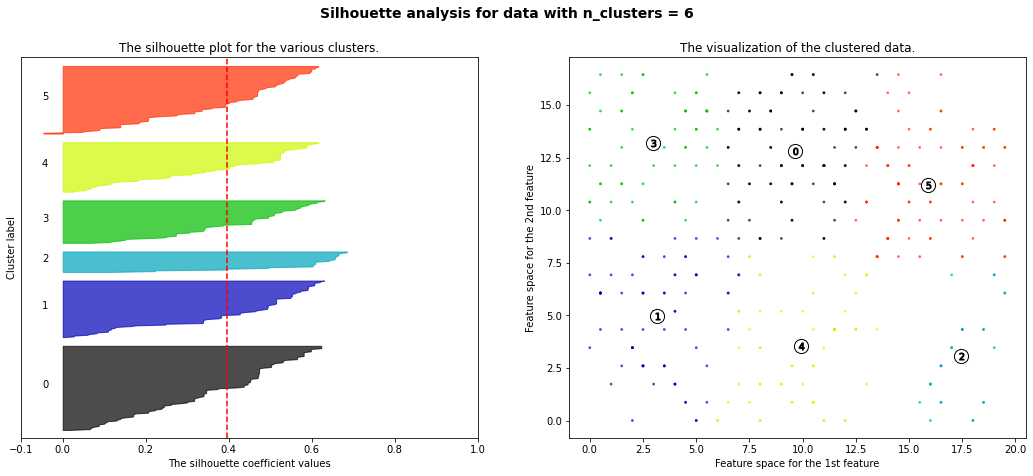

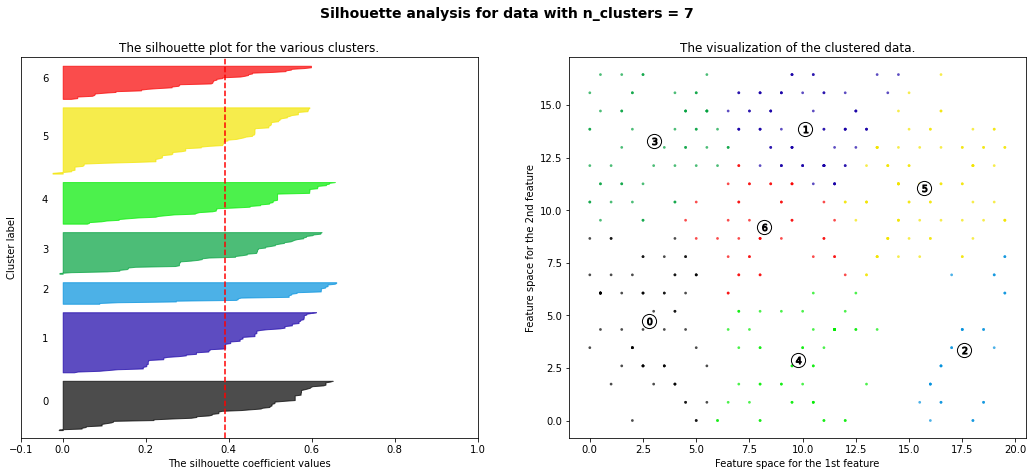

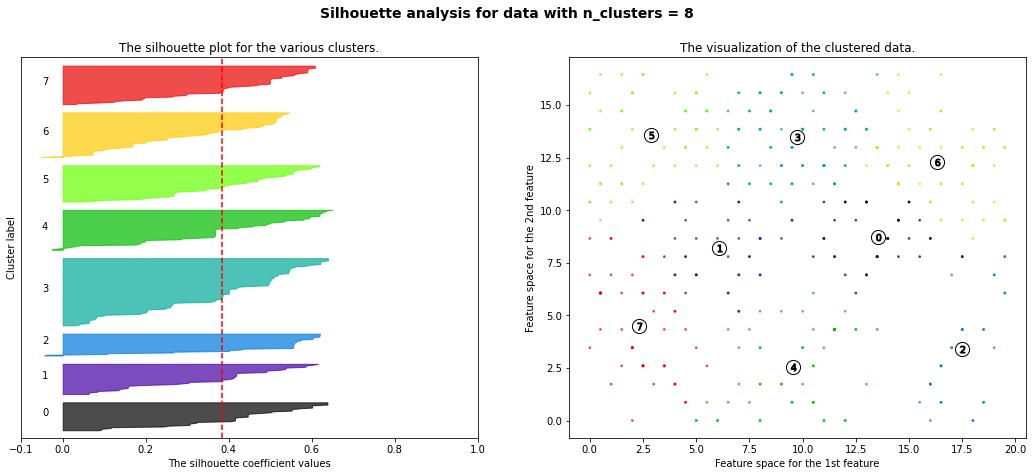

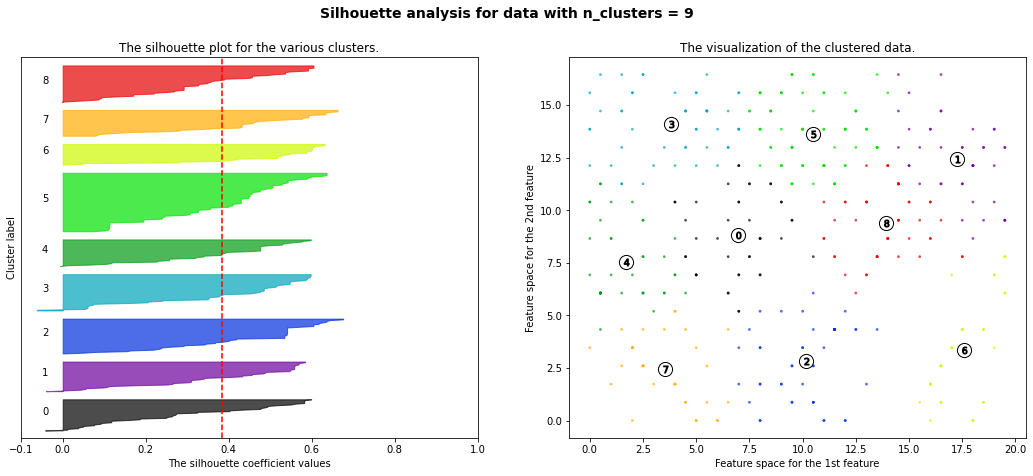

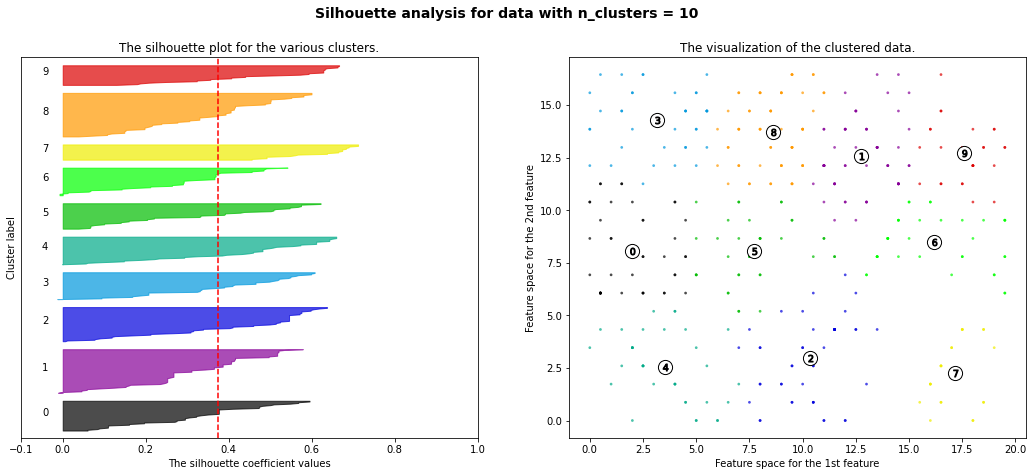

In [16]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(prj) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(prj)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(prj, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(prj, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(prj[:, 0], prj[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
df["clusters"]=kmeans.labels_

In [26]:
print(df["clusters"])
a = linear_order_clustering(df["clusters"])

0      0
1      0
2      0
3      0
4      0
      ..
409    0
410    0
411    0
412    0
413    0
Name: clusters, Length: 414, dtype: int32


NameError: name 'linear_order_clustering' is not defined

In [27]:
print(*df["clusters"], sep='\n')

0
0
0
0
0
0
0
0
1
1
1
1
0
1
0
1
0
2
2
1
0
0
1
0
0
0
0
0
0
0
1
0
0
2
0
1
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
0
0
2
1
1
0
2
0
2
2
2
0
0
0
0
2
0
2
2
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
2
2
0
0
0
0
0
1
1
0
1
0
1
1
0
1
1
0
1
0
1
1
1
1
0
0
1
0
1
0
2
2
0
2
1
0
0
0
1
2
1
1
1
2
1
2
2
2
2
2
2
2
1
1
1
1
1
1
2
0
2
2
0
1
1
0
0
0
1
0
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
1
1
2
1
2
1
0
0
2
1
2
0
0
2
2
2
2
1
2
1
1
1
0
1
1
1
2
1
2
0
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
0
0
0
2
0
0
1
1
0
2
1
1
1
0
0
2
0
0
2
0
0
0
2
1
1
0
0
2
1
1
0
2
2
2
2
0
2
2
2
1
0
1
1
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
1
1
2
2
1
1
1
1
1
1
1
1
2
2
1
2
1
1
1
0
1
2
1
1
0
1
2
2
2
1
2
2
1
1
0
2
0
2
0
1
1
1
1
0
1
2
0
1
1
1
2
2
2
2
2
2
0
0
1
0
1
2
2
2
2
2
2
2
0
1
0
0
0
2
2
0
2
2
2
2
0
1
1
0
1
1
0
0
0
1
0
2
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
0
0
0
0
0
0
0


In [10]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)
df["clusters"]=kmeans.labels_

In [11]:
print(df["clusters"])
a = linear_order_clustering(df["clusters"])

0      2
1      1
2      2
3      1
4      1
      ..
409    3
410    0
411    2
412    3
413    1
Name: clusters, Length: 414, dtype: int32


NameError: name 'linear_order_clustering' is not defined

In [12]:
print(*df["clusters"], sep='\n')

2
1
2
1
1
2
1
1
0
0
0
0
1
1
1
1
1
2
2
0
1
1
1
1
2
2
1
2
2
1
0
2
1
2
1
1
2
1
2
1
2
2
2
2
2
3
1
1
1
2
2
1
2
2
3
3
3
2
3
3
2
2
3
0
0
1
2
2
2
2
2
1
2
1
3
2
2
2
2
1
1
0
0
0
1
1
0
0
0
1
0
1
1
1
1
2
3
0
1
0
3
3
1
1
2
2
2
0
0
3
0
0
1
1
1
1
0
2
1
1
1
1
1
0
3
1
0
1
1
2
2
2
0
3
3
0
2
3
3
3
0
3
0
3
3
2
2
3
2
3
3
2
0
0
1
1
1
1
3
1
3
2
2
0
3
2
0
2
1
1
0
0
0
0
1
0
0
1
1
1
1
0
0
1
1
1
2
2
2
2
2
2
3
3
1
0
1
1
3
0
1
1
3
0
2
3
3
2
2
2
3
0
3
0
3
3
1
3
1
0
2
1
3
3
2
2
2
2
2
3
3
2
2
2
3
0
3
3
0
3
2
2
2
2
2
2
0
0
1
2
0
0
1
2
2
2
1
1
2
1
1
2
2
1
0
1
1
2
0
1
2
2
3
2
3
2
3
2
2
0
1
1
0
0
0
0
0
0
0
2
3
3
0
3
0
3
0
1
0
0
3
3
0
0
3
0
0
0
0
0
1
3
0
2
0
0
0
1
0
2
0
2
2
0
3
3
3
1
3
1
1
2
3
3
3
1
1
0
0
0
0
1
3
3
3
3
3
3
3
3
3
3
3
3
1
1
0
1
1
2
2
2
1
2
2
2
2
0
2
2
2
2
3
3
3
3
3
3
1
1
0
1
0
1
1
1
1
1
2
2
0
1
2
2
0
0
1
0
3
1
0
0
2
2
0
0
3
3
1
3
0
2
3
1


Text(0, 0.5, 'Inertia')

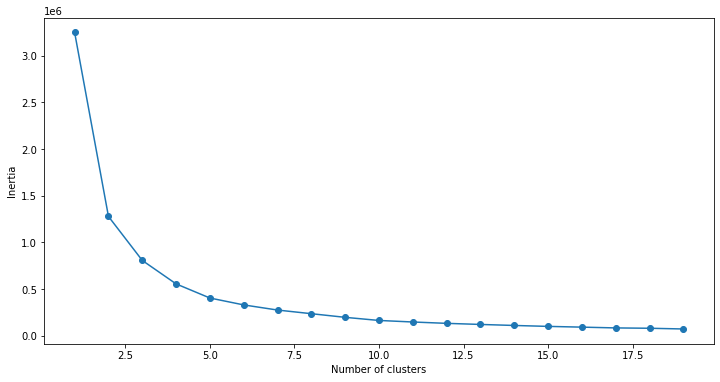

In [14]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(feature_vectors)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [15]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=6, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(feature_vectors)

KMeans(n_clusters=6)

In [16]:
kmeans.inertia_

329498.31668123294

In [17]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(feature_vectors)
    Sum_of_squared_distances.append(km.inertia_)

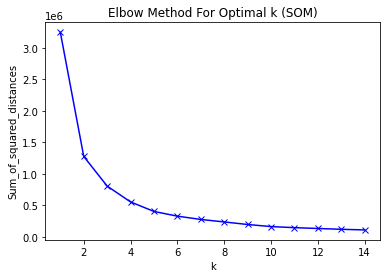

In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (SOM)')
plt.show()